### Accidents in UK

### Overview of the Project
Road accidents is one of the main issues in the world from past many years. There are many accidents happening all over the world and are leading to death of the person or injury.

By using the Open Road Safety Data for the 2020 dataset, which is available in the government website, I would like to perform the data analysis, plotting various visualizations and performing the machine learning algorithms.

My idea of the project is to predict the severity of accidents using the machine learning model.

In this project the data which I have selected is the raw data taken from the government website. So here I am going to perform some machine learning models and see which model gives the highest accuracy in predicting the severity of accidents.

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.filterwarnings("ignore")

### Importing Datasets

I have downloaded the csv files from government website of UK https://www.data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data which is the data source. Here i have used the data from 2020.

I have used three csv files which was published on 16 October 2021.
1. Road Safety Data - Casualties 2020
2. Road Safety Data - Vehicles 2020
3. Road Safety Data - Accidents 2020

Here i have imported all the CSV files.

In [2]:
accident = pd.read_csv('accident.csv')
accident.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,10219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,10220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,10228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,10228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,10228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,0,4,1,1,0,0,1,1,2,E01004763


In [3]:
vehicle = pd.read_csv('vehicle.csv')
vehicle.head()

,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,2020010219808,2020,10219808,1,9,9,5,1,5,0,...,6,2,32,6,1968,2,6,AUDI Q5,4,1
1,2020010220496,2020,10220496,1,9,0,4,2,6,0,...,2,1,45,7,1395,1,2,AUDI A1,7,1
2,2020010228005,2020,10228005,1,9,0,18,-1,-1,0,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
3,2020010228006,2020,10228006,1,8,0,18,1,5,0,...,1,1,44,7,1798,8,8,TOYOTA PRIUS,2,1
4,2020010228011,2020,10228011,1,9,0,18,3,7,9,...,6,1,20,4,2993,2,4,BMW 4 SERIES,-1,-1


In [4]:
casualty = pd.read_csv('casualty.csv')
casualty.head()

,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,2020010219808,2020,010219808,1,1,3,1,31,6,3,9,5,0,0,0,0,1,4
1,2020010220496,2020,010220496,1,1,3,2,2,1,3,1,1,0,0,0,0,1,2
2,2020010220496,2020,010220496,1,2,3,2,4,1,3,1,1,0,0,0,0,1,2
3,2020010228005,2020,010228005,1,1,3,1,23,5,3,5,9,0,0,0,0,1,3
4,2020010228006,2020,010228006,1,1,3,1,47,8,2,4,1,0,0,0,0,1,3


Here as i am using three csv files, i have merged all the three into a single dataframe called "uk" on a common column "accident_index".

I have used "merge" to combine all the three into single dataframe.

In [5]:
merge_df= pd.merge(accident,casualty,on='accident_index')
uk = pd.merge(merge_df, vehicle, on='accident_index')
pd.set_option('display.max_columns', None)
uk.head()

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,accident_year_y,accident_reference_y,vehicle_reference_x,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,accident_year,accident_reference,vehicle_reference_y,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,2020010278554,2020,010278554,531639.0,168889.0,-0.108858,51.403761,1,2,2,1,09/11/2020,2,20:20,20,E09000008,E09000008,5,0,6,20,0,-1,0,-1,0,0,4,1,2,0,0,1,1,2,E01000994,2020,010278554,2,1,1,1,23,5,2,0,0,0,0,0,3,-1,-1,2020,010278554,1,9,0,18,1,5,0,0,0,0,0,0,1,1,6,1,23,5,-1,-1,-1,-1,3,1
1,2020010278554,2020,010278554,531639.0,168889.0,-0.108858,51.403761,1,2,2,1,09/11/2020,2,20:20,20,E09000008,E09000008,5,0,6,20,0,-1,0,-1,0,0,4,1,2,0,0,1,1,2,E01000994,2020,010278554,2,1,1,1,23,5,2,0,0,0,0,0,3,-1,-1,2020,010278554,2,3,0,6,7,7,0,0,0,0,0,0,3,1,6,1,23,5,113,1,4,SUZUKI UK 110,-1,-1
2,2020010278556,2020,010278556,528687.0,184702.0,-0.145519,51.546549,1,2,2,1,04/11/2020,4,11:50,2,E09000007,E09000007,5,0,6,30,3,4,6,0,9,9,1,1,9,0,0,1,3,2,E01000927,2020,010278556,1,1,1,1,17,4,2,0,0,0,0,0,3,1,1,2020,010278556,1,3,0,99,9,9,99,9,9,99,9,99,9,1,6,1,17,4,125,1,4,HONDA CBR125R,1,1
3,2020010278556,2020,010278556,528687.0,184702.0,-0.145519,51.546549,1,2,2,1,04/11/2020,4,11:50,2,E09000007,E09000007,5,0,6,30,3,4,6,0,9,9,1,1,9,0,0,1,3,2,E01000927,2020,010278556,1,1,1,1,17,4,2,0,0,0,0,0,3,1,1,2020,010278556,2,9,0,99,9,9,99,9,9,99,9,99,1,9,6,3,35,6,1968,2,4,AUDI Q5,4,1
4,2020010278558,2020,010278558,534296.0,179438.0,-0.066682,51.497938,1,3,2,1,09/11/2020,2,19:31,8,E09000028,E09000028,3,200,2,20,3,2,5,0,0,5,4,1,2,0,0,1,1,2,E01004022,2020,010278558,1,1,1,1,45,7,3,0,0,0,0,0,3,1,3,2020,010278558,1,3,0,15,3,7,0,2,0,0,0,0,2,1,1,1,45,7,125,1,0,YAMAHA GPD 125,3,1


### Data pre-processing

The initial step before we start our analysis is cleaning, that is removing the unwanted columns or eliminating the null values.

In [6]:
uk.replace(-1, np.nan , inplace=True)

In [7]:
# Displaying top 5 rows in the dataset
uk.head()

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,accident_year_y,accident_reference_y,vehicle_reference_x,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,accident_year,accident_reference,vehicle_reference_y,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,2020010278554,2020,010278554,531639.0,168889.0,-0.108858,51.403761,1,2,2,1,09/11/2020,2,20:20,20.0,E09000008,E09000008,5,0,6,20.0,0.0,NaN,0.0,NaN,0.0,0.0,4.0,1.0,2.0,0.0,0.0,1,1.0,2.0,E01000994,2020,010278554,2,1,1,1.0,23.0,5.0,2,0.0,0.0,0.0,0.0,0.0,3,NaN,NaN,2020,010278554,1,9,0.0,18.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,6.0,1,23.0,5.0,NaN,NaN,NaN,-1,3.0,1.0
1,2020010278554,2020,010278554,531639.0,168889.0,-0.108858,51.403761,1,2,2,1,09/11/2020,2,20:20,20.0,E09000008,E09000008,5,0,6,20.0,0.0,NaN,0.0,NaN,0.0,0.0,4.0,1.0,2.0,0.0,0.0,1,1.0,2.0,E01000994,2020,010278554,2,1,1,1.0,23.0,5.0,2,0.0,0.0,0.0,0.0,0.0,3,NaN,NaN,2020,010278554,2,3,0.0,6.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1,6.0,1,23.0,5.0,113.0,1.0,4.0,SUZUKI UK 110,NaN,NaN
2,2020010278556,2020,010278556,528687.0,184702.0,-0.145519,51.546549,1,2,2,1,04/11/2020,4,11:50,2.0,E09000007,E09000007,5,0,6,30.0,3.0,4.0,6.0,0.0,9.0,9.0,1.0,1.0,9.0,0.0,0.0,1,3.0,2.0,E01000927,2020,010278556,1,1,1,1.0,17.0,4.0,2,0.0,0.0,0.0,0.0,0.0,3,1.0,1.0,2020,010278556,1,3,0.0,99.0,9.0,9.0,99.0,9.0,9.0,99.0,9.0,99.0,9.0,1,6.0,1,17.0,4.0,125.0,1.0,4.0,HONDA CBR125R,1.0,1.0
3,2020010278556,2020,010278556,528687.0,184702.0,-0.145519,51.546549,1,2,2,1,04/11/2020,4,11:50,2.0,E09000007,E09000007,5,0,6,30.0,3.0,4.0,6.0,0.0,9.0,9.0,1.0,1.0,9.0,0.0,0.0,1,3.0,2.0,E01000927,2020,010278556,1,1,1,1.0,17.0,4.0,2,0.0,0.0,0.0,0.0,0.0,3,1.0,1.0,2020,010278556,2,9,0.0,99.0,9.0,9.0,99.0,9.0,9.0,99.0,9.0,99.0,1.0,9,6.0,3,35.0,6.0,1968.0,2.0,4.0,AUDI Q5,4.0,1.0
4,2020010278558,2020,010278558,534296.0,179438.0,-0.066682,51.497938,1,3,2,1,09/11/2020,2,19:31,8.0,E09000028,E09000028,3,200,2,20.0,3.0,2.0,5.0,0.0,0.0,5.0,4.0,1.0,2.0,0.0,0.0,1,1.0,2.0,E01004022,2020,010278558,1,1,1,1.0,45.0,7.0,3,0.0,0.0,0.0,0.0,0.0,3,1.0,3.0,2020,010278558,1,3,0.0,15.0,3.0,7.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,1,1.0,1,45.0,7.0,125.0,1.0,0.0,YAMAHA GPD 125,3.0,1.0


In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
# Displaying the information of the data
uk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177024 entries, 0 to 177023
Data columns (total 79 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               177024 non-null  object 
 1   accident_year_x                              177024 non-null  int64  
 2   accident_reference_x                         177024 non-null  object 
 3   location_easting_osgr                        176990 non-null  float64
 4   location_northing_osgr                       176990 non-null  float64
 5   longitude                                    176990 non-null  float64
 6   latitude                                     176990 non-null  float64
 7   police_force                                 177024 non-null  int64  
 8   accident_severity                            177024 non-null  int64  
 9   number_of_vehicles                           177024 non-nul

Now lets see the number of null values in the dataframe.

In [10]:
uk.isnull().sum()

accident_index                                     0
accident_year_x                                    0
accident_reference_x                               0
location_easting_osgr                             34
location_northing_osgr                            34
longitude                                         34
latitude                                          34
police_force                                       0
accident_severity                                  0
number_of_vehicles                                 0
number_of_casualties                               0
date                                               0
day_of_week                                        0
time                                               0
local_authority_district                        2345
local_authority_ons_district                       0
local_authority_highway                            0
first_road_class                                   0
first_road_number                             

In [11]:
uk.describe()

,accident_year_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,accident_year_y,vehicle_reference_x,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,accident_year,vehicle_reference_y,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
count,177024.0,176990.000000,1.769900e+05,176990.000000,176990.000000,177024.000000,177024.000000,177024.000000,177024.000000,177024.000000,174679.000000,177024.000000,177024.000000,177024.000000,177013.000000,177020.000000,94836.000000,176743.000000,95417.000000,176706.000000,176712.000000,177023.000000,177023.000000,176361.000000,176539.000000,176558.000000,177024.000000,177023.000000,165986.000000,177024.0,177024.000000,177024.000000,177024.000000,176672.000000,174156.000000,174156.000000,177024.000000,177022.000000,177022.000000,176397.000000,176990.000000,176921.000000,177024.000000,160180.000000,159938.000000,177024.0,177024.000000,177024.000000,176217.000000,176200.000000,175179.000000,175163.000000,176254.000000,176657.000000,176216.000000,176249.000000,176226.000000,177021.000000,175887.000000,177024.000000,177022.000000,177024.000000,157891.000000,157891.000000,135878.000000,136453.000000,136388.000000,148503.000000,148757.000000
mean,2020.0,443298.820080,2.846181e+05,-1.374337,52.449868,31.966626,2.741013,2.211508,1.804535,4.120899,372.289480,4.145314,869.652081,5.218874,39.820239,2.417732,3.644207,2.845929,438.457099,0.072765,0.755682,2.059806,1.617807,1.362331,0.126873,0.079220,1.425473,1.289420,1.896485,2020.0,1.613024,1.443787,1.343999,1.385019,37.990979,6.527883,2.806495,0.395222,0.315390,0.247912,0.024691,0.009501,8.184947,1.340979,5.087184,2020.0,1.612013,10.405380,0.060687,14.338371,4.191678,4.233640,1.435383,2.226127,0.356194,1.663510,0.535222,1.764277,1.794931,1.084090,4.700082,1.436037,40.705221,6.921509,1852.341674,1.612885,8.428542,5.180623,1.365327
std,0.0,93396.469702,1.405061e+05,1.360752,1.266750,20.431601,0.484563,0.944919,1.391881,1.943736,209.754052,1.502950,1669.025954,1.587756,14.818039,5.749962,0.872603,2.778765,1292.836503,0.728806,1.931710,1.747112,1.680313,0.629218,0.828235,0.638632,0.494804,0.512003,0.304631,0.0,3.421687,4.599348,0.603752,0.489524,18.540730,2.170382,0.426590,1.606093,1.442206,0.577620,0.305904,0.135849,9.851894,0.682857,2.855280,0.0,2.498557,11.352955,0.597950,11.547370,2.472112,2.450167,11.125856,3.058558,1.310228,11.298626,1.756591,11.138959,1.257262,0.787315,1.881799,0.636411,16.657587,1.806464,1546.959568,1.075910,5.668430,2.843183,0.704160
min,2020.0,71500.000000,1.271500e+04,-7.412812,49.970479,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2020.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00

In [12]:
uk.shape

(177024, 79)

In [13]:
len(uk)

177024

Dropping few unnecessary columns and also dropping few columns which have more null values and are not useful for my analysis.

In [14]:
uk.drop(['casualty_home_area_type','casualty_imd_decile','second_road_class','junction_control','second_road_number','trunk_road_flag','engine_capacity_cc','propulsion_code','generic_make_model','driver_imd_decile','driver_home_area_type','age_of_vehicle','accident_year_y'], axis=1, inplace=True)
uk = uk.dropna()

In [15]:
len(uk)

151747

In [16]:
uk.isnull().sum()

accident_index                                 0
accident_year_x                                0
accident_reference_x                           0
location_easting_osgr                          0
location_northing_osgr                         0
longitude                                      0
latitude                                       0
police_force                                   0
accident_severity                              0
number_of_vehicles                             0
number_of_casualties                           0
date                                           0
day_of_week                                    0
time                                           0
local_authority_district                       0
local_authority_ons_district                   0
local_authority_highway                        0
first_road_class                               0
first_road_number                              0
road_type                                      0
speed_limit         

From the above we can see that all the null values have been removed

In [17]:
# Displaying the top 5 rows of the data
uk.head()

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,lsoa_of_accident_location,accident_reference_y,vehicle_reference_x,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,accident_year,accident_reference,vehicle_reference_y,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver
0,2020010278554,2020,010278554,531639.0,168889.0,-0.108858,51.403761,1,2,2,1,09/11/2020,2,20:20,20.0,E09000008,E09000008,5,0,6,20.0,0.0,0.0,0.0,4.0,1.0,2.0,0.0,0.0,1,1.0,E01000994,010278554,2,1,1,1.0,23.0,5.0,2,0.0,0.0,0.0,0.0,0.0,3,2020,010278554,1,9,0.0,18.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,6.0,1,23.0,5.0
1,2020010278554,2020,010278554,531639.0,168889.0,-0.108858,51.403761,1,2,2,1,09/11/2020,2,20:20,20.0,E09000008,E09000008,5,0,6,20.0,0.0,0.0,0.0,4.0,1.0,2.0,0.0,0.0,1,1.0,E01000994,010278554,2,1,1,1.0,23.0,5.0,2,0.0,0.0,0.0,0.0,0.0,3,2020,010278554,2,3,0.0,6.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1,6.0,1,23.0,5.0
2,2020010278556,2020,010278556,528687.0,184702.0,-0.145519,51.546549,1,2,2,1,04/11/2020,4,11:50,2.0,E09000007,E09000007,5,0,6,30.0,3.0,9.0,9.0,1.0,1.0,9.0,0.0,0.0,1,3.0,E01000927,010278556,1,1,1,1.0,17.0,4.0,2,0.0,0.0,0.0,0.0,0.0,3,2020,010278556,1,3,0.0,99.0,9.0,9.0,99.0,9.0,9.0,99.0,9.0,99.0,9.0,1,6.0,1,17.0,4.0
3,2020010278556,2020,010278556,528687.0,184702.0,-0.145519,51.546549,1,2,2,1,04/11/2020,4,11:50,2.0,E09000007,E09000007,5,0,6,30.0,3.0,9.0,9.0,1.0,1.0,9.0,0.0,0.0,1,3.0,E01000927,010278556,1,1,1,1.0,17.0,4.0,2,0.0,0.0,0.0,0.0,0.0,3,2020,010278556,2,9,0.0,99.0,9.0,9.0,99.0,9.0,9.0,99.0,9.0,99.0,1.0,9,6.0,3,35.0,6.0
4,2020010278558,2020,010278558,534296.0,179438.0,-0.066682,51.497938,1,3,2,1,09/11/2020,2,19:31,8.0,E09000028,E09000028,3,200,2,20.0,3.0,0.0,5.0,4.0,1.0,2.0,0.0,0.0,1,1.0,E01004022,010278558,1,1,1,1.0,45.0,7.0,3,0.0,0.0,0.0,0.0,0.0,3,2020,010278558,1,3,0.0,15.0,3.0,7.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,1,1.0,1,45.0,7.0


In [18]:
# Displaying the last 5 rows of the data
uk.tail()

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,lsoa_of_accident_location,accident_reference_y,vehicle_reference_x,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,accident_year,accident_reference,vehicle_reference_y,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver
177019,2020990963826,2020,990963826,202304.0,763674.0,-5.232567,56.722717,99,2,3,1,11/07/2020,7,13:25,927.0,S12000017,S12000017,3,82,6,50.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2,2.0,-1,990963826,3,1,1,1.0,52.0,8.0,2,0.0,0.0,0.0,0.0,0.0,5,2020,990963826,1,5,0.0,4.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,5.0,1,51.0,8.0
177020,2020990963826,2020,990963826,202304.0,763674.0,-5.232567,56.722717,99,2,3,1,11/07/2020,7,13:25,927.0,S12000017,S12000017,3,82,6,50.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2,2.0,-1,990963826,3,1,1,1.0,52.0,8.0,2,0.0,0.0,0.0,0.0,0.0,5,2020,990963826,2,5,0.0,4.0,1.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,2.0,1,5.0,1,53.0,8.0
177021,2020990963826,2020,990963826,202304.0,763674.0,-5.232567,56.722717,99,2,3,1,11/07/2020,7,13:25,927.0,S12000017,S12000017,3,82,6,50.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2,2.0,-1,990963826,3,1,1,1.0,52.0,8.0,2,0.0,0.0,0.0,0.0,0.0,5,2020,990963826,3,5,0.0,18.0,5.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,5.0,1,52.0,8.0
177022,2020990963829,2020,990963829,268422.0,551147.0,-4.050270,54.837812,99,3,1,1,11/07/2020,7,18:05,917.0,S12000006,S12000006,6,0,6,30.0,8.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1,2.0,-1,990963829,1,1,3,2.0,79.0,11.0,3,6.0,9.0,0.0,0.0,0.0,0,2020,990963829,1,9,0.0,1.0,4.0,8.0,9.0,6.0,0.0,0.0,0.0,0.0,2.0,1,5.0,1,30.0,6.0
177023,2020990963831,2020,990963831,334615.0,730824.0,-3.062750,56.464988,99,3,3,1,12/07/2020,1,12:40,918.0,S12000042,S12000042,3,90,3,70.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1,1.0,-1,990963831,2,1,1,1.0,51.0,8.0,3,0.0,0.0,0.0,0.0,0.0,5,2020,990963831,1,9,0.0,9.0,6.0,4.0,0.0,8.0,0.0,0.0,0.0,0.0,4.0,1,5.0,1,31.0,6.0


In [19]:
uk.shape

(151747, 66)

In [20]:
# Copying the data frame into a new data frame
uk_copy = uk.copy()

In [21]:
uk_copy.head()

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,lsoa_of_accident_location,accident_reference_y,vehicle_reference_x,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,accident_year,accident_reference,vehicle_reference_y,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver
0,2020010278554,2020,010278554,531639.0,168889.0,-0.108858,51.403761,1,2,2,1,09/11/2020,2,20:20,20.0,E09000008,E09000008,5,0,6,20.0,0.0,0.0,0.0,4.0,1.0,2.0,0.0,0.0,1,1.0,E01000994,010278554,2,1,1,1.0,23.0,5.0,2,0.0,0.0,0.0,0.0,0.0,3,2020,010278554,1,9,0.0,18.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,6.0,1,23.0,5.0
1,2020010278554,2020,010278554,531639.0,168889.0,-0.108858,51.403761,1,2,2,1,09/11/2020,2,20:20,20.0,E09000008,E09000008,5,0,6,20.0,0.0,0.0,0.0,4.0,1.0,2.0,0.0,0.0,1,1.0,E01000994,010278554,2,1,1,1.0,23.0,5.0,2,0.0,0.0,0.0,0.0,0.0,3,2020,010278554,2,3,0.0,6.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1,6.0,1,23.0,5.0
2,2020010278556,2020,010278556,528687.0,184702.0,-0.145519,51.546549,1,2,2,1,04/11/2020,4,11:50,2.0,E09000007,E09000007,5,0,6,30.0,3.0,9.0,9.0,1.0,1.0,9.0,0.0,0.0,1,3.0,E01000927,010278556,1,1,1,1.0,17.0,4.0,2,0.0,0.0,0.0,0.0,0.0,3,2020,010278556,1,3,0.0,99.0,9.0,9.0,99.0,9.0,9.0,99.0,9.0,99.0,9.0,1,6.0,1,17.0,4.0
3,2020010278556,2020,010278556,528687.0,184702.0,-0.145519,51.546549,1,2,2,1,04/11/2020,4,11:50,2.0,E09000007,E09000007,5,0,6,30.0,3.0,9.0,9.0,1.0,1.0,9.0,0.0,0.0,1,3.0,E01000927,010278556,1,1,1,1.0,17.0,4.0,2,0.0,0.0,0.0,0.0,0.0,3,2020,010278556,2,9,0.0,99.0,9.0,9.0,99.0,9.0,9.0,99.0,9.0,99.0,1.0,9,6.0,3,35.0,6.0
4,2020010278558,2020,010278558,534296.0,179438.0,-0.066682,51.497938,1,3,2,1,09/11/2020,2,19:31,8.0,E09000028,E09000028,3,200,2,20.0,3.0,0.0,5.0,4.0,1.0,2.0,0.0,0.0,1,1.0,E01004022,010278558,1,1,1,1.0,45.0,7.0,3,0.0,0.0,0.0,0.0,0.0,3,2020,010278558,1,3,0.0,15.0,3.0,7.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,1,1.0,1,45.0,7.0


In [22]:
uk_copy.tail()

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,lsoa_of_accident_location,accident_reference_y,vehicle_reference_x,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,accident_year,accident_reference,vehicle_reference_y,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver
177019,2020990963826,2020,990963826,202304.0,763674.0,-5.232567,56.722717,99,2,3,1,11/07/2020,7,13:25,927.0,S12000017,S12000017,3,82,6,50.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2,2.0,-1,990963826,3,1,1,1.0,52.0,8.0,2,0.0,0.0,0.0,0.0,0.0,5,2020,990963826,1,5,0.0,4.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,5.0,1,51.0,8.0
177020,2020990963826,2020,990963826,202304.0,763674.0,-5.232567,56.722717,99,2,3,1,11/07/2020,7,13:25,927.0,S12000017,S12000017,3,82,6,50.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2,2.0,-1,990963826,3,1,1,1.0,52.0,8.0,2,0.0,0.0,0.0,0.0,0.0,5,2020,990963826,2,5,0.0,4.0,1.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,2.0,1,5.0,1,53.0,8.0
177021,2020990963826,2020,990963826,202304.0,763674.0,-5.232567,56.722717,99,2,3,1,11/07/2020,7,13:25,927.0,S12000017,S12000017,3,82,6,50.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2,2.0,-1,990963826,3,1,1,1.0,52.0,8.0,2,0.0,0.0,0.0,0.0,0.0,5,2020,990963826,3,5,0.0,18.0,5.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,5.0,1,52.0,8.0
177022,2020990963829,2020,990963829,268422.0,551147.0,-4.050270,54.837812,99,3,1,1,11/07/2020,7,18:05,917.0,S12000006,S12000006,6,0,6,30.0,8.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1,2.0,-1,990963829,1,1,3,2.0,79.0,11.0,3,6.0,9.0,0.0,0.0,0.0,0,2020,990963829,1,9,0.0,1.0,4.0,8.0,9.0,6.0,0.0,0.0,0.0,0.0,2.0,1,5.0,1,30.0,6.0
177023,2020990963831,2020,990963831,334615.0,730824.0,-3.062750,56.464988,99,3,3,1,12/07/2020,1,12:40,918.0,S12000042,S12000042,3,90,3,70.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1,1.0,-1,990963831,2,1,1,1.0,51.0,8.0,3,0.0,0.0,0.0,0.0,0.0,5,2020,990963831,1,9,0.0,9.0,6.0,4.0,0.0,8.0,0.0,0.0,0.0,0.0,4.0,1,5.0,1,31.0,6.0


We have a date column which is object data type. So now lets convert to Datetime data type which can be useful for the visualizations.

In [23]:
# Changing the date time column to data time data type
uk_copy['date']= pd.to_datetime(uk_copy['date'], format="%d/%m/%Y")

In [24]:
uk_copy.iloc[:, 11:15].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151747 entries, 0 to 177023
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   date                      151747 non-null  datetime64[ns]
 1   day_of_week               151747 non-null  int64         
 2   time                      151747 non-null  object        
 3   local_authority_district  151747 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.8+ MB


### Converting into categorical values

In [25]:
#Here i am converting few columns to categorical which are useful for our data visualizations

uk_copy['accident_severity'].replace([1, 2, 3],['Fatal', 'Serious', 'Slight'], inplace=True)

uk_copy['light_conditions'].replace([1,4,5,6,7,-1],['Daylight', 'Darkness - lights lit', 'Darkness - lights unlit', 'Darkness - no lighting', 'Darkness - lighting unknown', 'NaN'], inplace=True)

uk_copy['weather_conditions'].replace([1,2,3,4,5,6,7,8,9,-1],['Fine no high winds', 'Raining no high winds', 'Snowing no high winds','Fine + high winds','Raining + high winds','Snowing + high winds','Fog or mist','Other','Unknown','NaN'], inplace=True)

uk_copy['road_surface_conditions'].replace([1,2,3,4,5,6,7,-1,9],['Dry', 'Wet or damp', 'Snow', 'Frost or ice', 'Flood over 3cm. deep', 'Oil or diesel', 'Mud','NaN','NaN'], inplace=True)

uk_copy['special_conditions_at_site'].replace([0,1,2,3,4,5,6,7,-1,9],['None', 'Auto traffic signal - out', 'Auto signal part defective', 'Road sign or marking defective or obscured','Roadworks','Road surface defective','Oil or diesel','Mud','NaN','NaN'], inplace=True)

uk_copy['sex_of_driver'].replace([1,2,3,-1],['Male', 'Female', 'NaN', 'NaN'], inplace=True)

uk_copy['age_band_of_driver'].replace([1,2,3,4,5,6,7,8,9,10,11,-1],['0-5','6-10','11-15','16-20','21-25','26-35','36-45','46-55','56-65','66-75','Above 75','NaN'], inplace=True)

uk_copy['vehicle_type'].replace([1,2,3,4,5,8,9,10,11,16,17,18,19,20,21,22,23,90,97,98,99,103,104,105,106,108,109,110,113,-1],['Pedal Cycle', 'Motorcycle 50cc and under','Motorcycle 125cc and under','Motorcycle over 125cc and up to 500cc','Motorcycle over 500cc','Taxi/Private hire car','Car','Minibus','Bus','Ridden horse','Agricultural vehicle','Tram','Van','Goods over 3.5t. and under 7.5t','Goods 7.5 tonnes mgw and over','Mobility scooter','Electric motorcycle','Other vehicle','Motorcycle - unknown cc','Goods vehicle - unknown weight','Unknown vehicle type','Motorcycle - Scooter (1979-1998)','Motorcycle (1979-1998)','Motorcycle - Combination (1979-1998)','Motorcycle over 125cc (1999-2004)','Taxi (excluding private hire cars) (1979-2004)','Car (including private hire cars) (1979-2004)','Minibus/Motor caravan (1979-1998)','Goods over 3.5 tonnes (1979-1998)','NaN'], inplace=True)

uk_copy['day_of_week'].replace([1, 2, 3, 4, 5, 6, 7],['Sunday', 'Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday','Saturday'], inplace=True)

uk_copy['road_type'].replace([1,2,3,6,7,9,12,-1],['Roundabout', 'One way street', 'Dual carriageway','Single carriageway','Slip Road','Unknown','One way street/slip road','NaN'], inplace=True)

uk_copy['age_band_of_driver'].replace([1,2,3,4,5,6,7,8,9,10,11],['0-5', '6-10', '11-15','16-20','21-25','26-35','36-45','46-55','56-65','66-75','Over 75'], inplace=True)

In [26]:
uk_clean = uk_copy.copy()
len(uk_clean)

151747

In [27]:
# Cleaning the data frame once again.

uk_clean= uk_clean.replace('NaN', np.nan)

In [28]:
uk_clean.dropna(how='any',inplace=True)

In [29]:
uk_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149927 entries, 0 to 177023
Data columns (total 66 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   accident_index                               149927 non-null  object        
 1   accident_year_x                              149927 non-null  int64         
 2   accident_reference_x                         149927 non-null  object        
 3   location_easting_osgr                        149927 non-null  float64       
 4   location_northing_osgr                       149927 non-null  float64       
 5   longitude                                    149927 non-null  float64       
 6   latitude                                     149927 non-null  float64       
 7   police_force                                 149927 non-null  int64         
 8   accident_severity                            149927 non-null  ob

In [30]:
uk_clean.head()

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,lsoa_of_accident_location,accident_reference_y,vehicle_reference_x,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,accident_year,accident_reference,vehicle_reference_y,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver
0,2020010278554,2020,010278554,531639.0,168889.0,-0.108858,51.403761,1,Serious,2,1,2020-11-09,Monday,20:20,20.0,E09000008,E09000008,5,0,Single carriageway,20.0,0.0,0.0,0.0,Darkness - lights lit,Fine no high winds,Wet or damp,None,0.0,1,1.0,E01000994,010278554,2,1,1,1.0,23.0,5.0,2,0.0,0.0,0.0,0.0,0.0,3,2020,010278554,1,Car,0.0,18.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,6.0,Male,23.0,21-25
1,2020010278554,2020,010278554,531639.0,168889.0,-0.108858,51.403761,1,Serious,2,1,2020-11-09,Monday,20:20,20.0,E09000008,E09000008,5,0,Single carriageway,20.0,0.0,0.0,0.0,Darkness - lights lit,Fine no high winds,Wet or damp,None,0.0,1,1.0,E01000994,010278554,2,1,1,1.0,23.0,5.0,2,0.0,0.0,0.0,0.0,0.0,3,2020,010278554,2,Motorcycle 125cc and under,0.0,6.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1,6.0,Male,23.0,21-25
4,2020010278558,2020,010278558,534296.0,179438.0,-0.066682,51.497938,1,Slight,2,1,2020-11-09,Monday,19:31,8.0,E09000028,E09000028,3,200,One way street,20.0,3.0,0.0,5.0,Darkness - lights lit,Fine no high winds,Wet or damp,None,0.0,1,1.0,E01004022,010278558,1,1,1,1.0,45.0,7.0,3,0.0,0.0,0.0,0.0,0.0,3,2020,010278558,1,Motorcycle 125cc and under,0.0,15.0,3.0,7.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,1,1.0,Male,45.0,36-45
5,2020010278558,2020,010278558,534296.0,179438.0,-0.066682,51.497938,1,Slight,2,1,2020-11-09,Monday,19:31,8.0,E09000028,E09000028,3,200,One way street,20.0,3.0,0.0,5.0,Darkness - lights lit,Fine no high winds,Wet or damp,None,0.0,1,1.0,E01004022,010278558,1,1,1,1.0,45.0,7.0,3,0.0,0.0,0.0,0.0,0.0,3,2020,010278558,2,Car,0.0,4.0,3.0,7.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1,6.0,Female,22.0,21-25
6,2020010278559,2020,010278559,530354.0,172580.0,-0.125965,51.437228,1,Slight,2,1,2020-11-09,Monday,19:13,9.0,E09000022,E09000022,5,0,Single carriageway,30.0,0.0,0.0,5.0,Darkness - lights lit,Fine no high winds,Wet or damp,None,0.0,1,1.0,E01003151,010278559,1,1,1,1.0,45.0,7.0,3,0.0,0.0,0.0,0.0,0.0,3,2020,010278559,1,Motorcycle 125cc and under,0.0,18.0,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1,6.0,Male,45.0,36-45


## Data Visualization

Around what time of the day do accidents occur the most?
Here i have divided them into 5 categories
1. Rush in the morning (6-10)
2. Working office hours (10-16)
3. Rush in the afternoon (16-18)
4. Evening (18-22)
5. Night (22-6)

In [31]:
# Splitting the time in a day
timings = {1: 'Rush in the morning (6-10)', 
           2: 'Working office hours (10-16)', 
           3: 'Rush in the afternoon (16-18)', 
           4: 'Evening (18-22)', 
           5: 'Night (22-6)'}

In [32]:
# Converting time to hour and into int datatype
uk_clean['hour'] = uk_clean['time'].str[0:2]
uk_clean['hour'] = pd.to_numeric(uk_clean['hour'])
uk_clean = uk_clean.dropna(subset=['hour'])
uk_clean['hour'] = uk_clean['hour'].astype('int')

In [33]:
# Splitting the time in a part of day
def time(hour):
    if hour >= 6 and hour < 10:
        return "1"
    elif hour >= 10 and hour < 16:
        return "2"
    elif hour >= 16 and hour < 18:
        return "3"
    elif hour >= 18 and hour < 22:
        return "4"
    else:
        return "5"

In [34]:
uk_clean['daytime'] = uk_clean['hour'].apply(time)
uk_clean[['time', 'hour', 'daytime']].head()

,time,hour,daytime
0,20:20,20,4
1,20:20,20,4
4,19:31,19,4
5,19:31,19,4
6,19:13,19,4


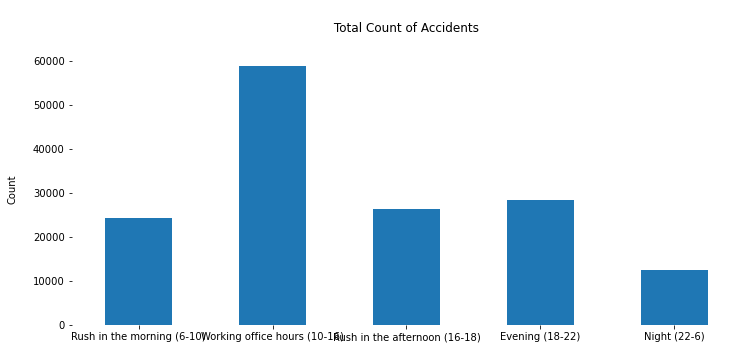

In [35]:
labels = tuple(timings.values())
uk_clean.groupby('daytime').size().plot(kind='bar', figsize=(12,5), grid=False)
plt.xticks(np.arange(5), labels, rotation='horizontal')
plt.xlabel(''), plt.ylabel('Count\n')
plt.title('\n Total Count of Accidents \n')
sns.despine(top=True, right=True, left=True, bottom=True);

Analysis: From the above bar graph we can say that most of the accidents are in the morning time that is from 10-16 which is working office hours time and the count is almost 60000 and the least is during the night from 22-6, the count is nearly 15000.

### Average Number of Casualties Based on part of a day

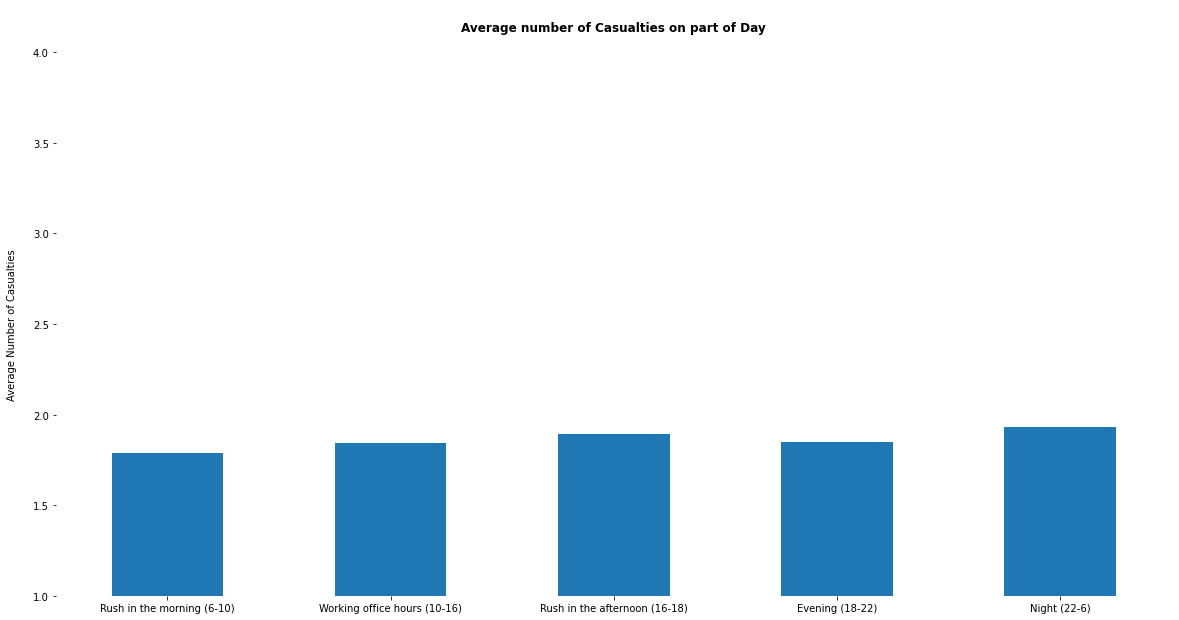

In [36]:
uk_clean.groupby('daytime')['number_of_casualties'].mean().plot(kind='bar',figsize=(20,10), grid=False)
plt.xticks(np.arange(5), labels, rotation='horizontal')
plt.ylim((1,4))
plt.xlabel(''), plt.ylabel('Average Number of Casualties\n')
plt.title('\nAverage number of Casualties on part of Day\n', fontweight='bold')
sns.despine(top=True, right=True, left=True, bottom=True);

Analysis: From the above bar graph i see that there are more number of casualties in the night time that is from 22-6 and the least count is rush in the morning 6-10. The reason for more number of casulaties during night may be due to bad lighting is one of the reason.

### Average Number of Casualties based on speed limit in part of a day

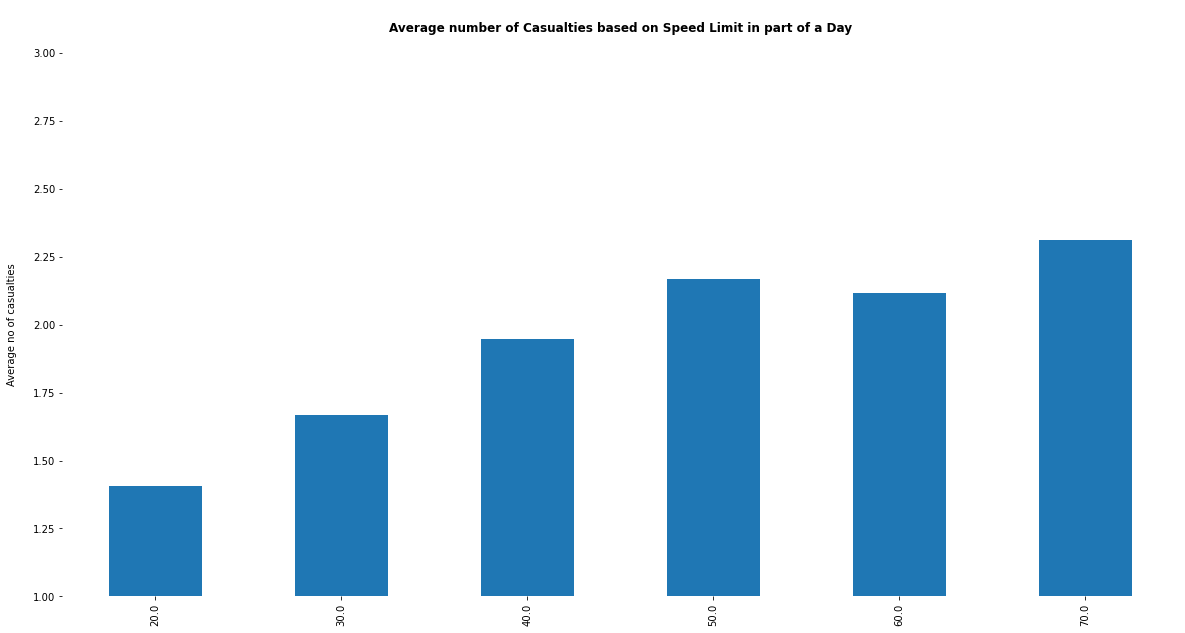

In [37]:
uk_clean.groupby('speed_limit')['number_of_casualties'].mean().plot(kind='bar',figsize=(20,10), grid=False)
plt.ylim((1,3))
plt.xlabel(''), plt.ylabel('Average no of casualties\n')
plt.title('\nAverage number of Casualties based on Speed Limit in part of a Day\n', fontweight='bold')
sns.despine(top=True, right=True, left=True, bottom=True);

Analysis: From the above graph i see that there are more number of casualties with the speed limit of 70.0mph and least number of casualties with a speed limit of 20.0mph

### Total count of Accidents on weekly basis

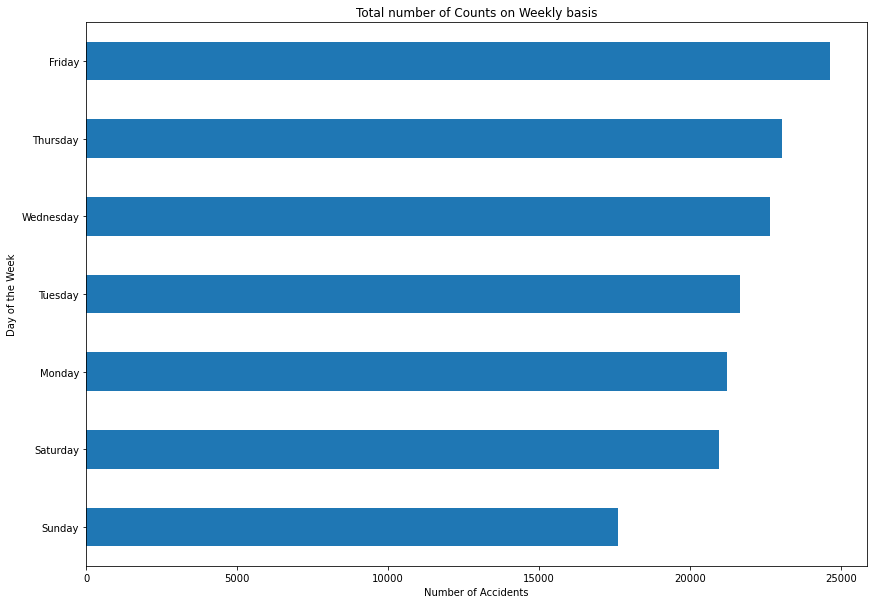

In [38]:
# Bar plots showing the type of crime frequency
plt.figure(figsize=(14,10))
plt.title("Total number of Counts on Weekly basis")
plt.xlabel("Number of Accidents")
plt.ylabel("Day of the Week")
uk_copy['day_of_week'].value_counts(ascending= True).plot(kind='barh')
plt.show()

Analysis: From the above graph we can see that there are more number of accidents during Friday the reason maybe due to the weekend and the least is on sunday.

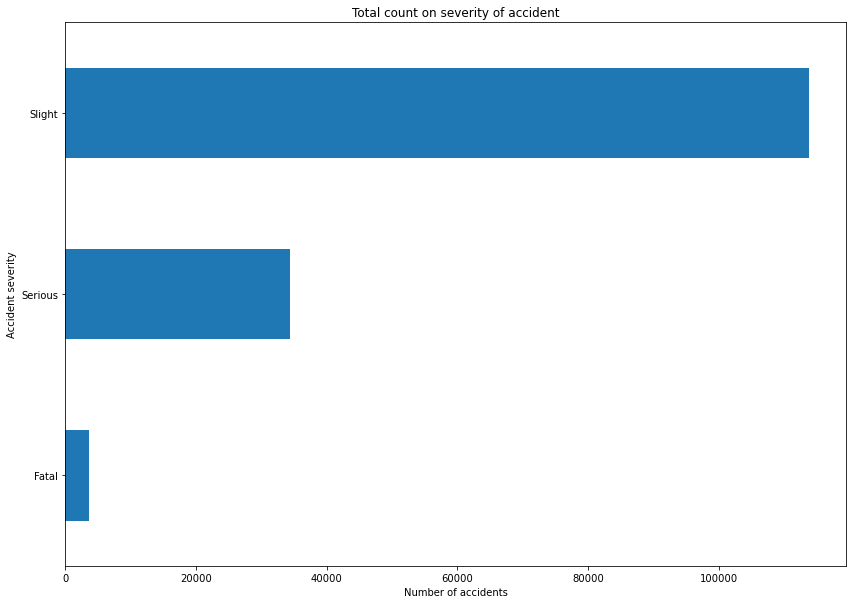

In [39]:
# Bar plots showing the type of crime frequency
plt.figure(figsize=(14,10))
plt.title("Total count on severity of accident")
plt.xlabel("Number of accidents")
plt.ylabel("Accident severity")
uk_copy['accident_severity'].value_counts(ascending= True).plot(kind='barh')
plt.show()

Analysis: From the above graph we can see that slight severity has been the highest count and the least is Fatal.

In [40]:
uk_clean['day_of_week'].value_counts()

Friday       24347
Thursday     22728
Wednesday    22375
Tuesday      21412
Monday       20963
Saturday     20682
Sunday       17420
Name: day_of_week, dtype: int64

From the above results we see the friday has the more number of count of accidents than any other day.

### Accidents based on gender

In [41]:
# Checking the total count of each gender
uk_clean['sex_of_driver'].value_counts()

Male      104279
Female     45648
Name: sex_of_driver, dtype: int64

From the above result count is see that male count is more for the severity of accidents compared to female.

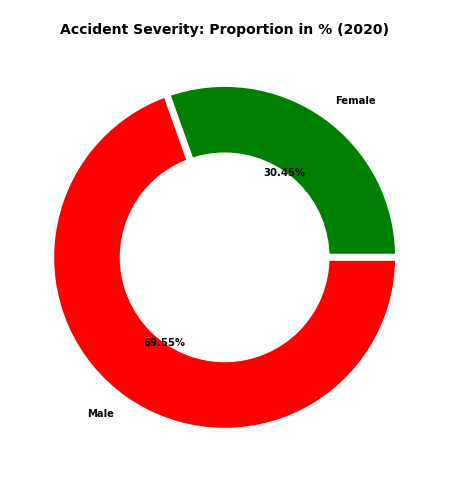

In [42]:
# Plotting a Pie chart based on the total count of 'sex_of_driver' column
female = uk_clean.sex_of_driver.value_counts()['Female']
male = uk_clean.sex_of_driver.value_counts()['Male']

names = ['Female','Male']
size  = [female, male]

plt.pie(x=size, labels=names, colors=['Green', 'Red'], 
        autopct='%1.2f%%', pctdistance=0.6, textprops=dict(fontweight='bold'),
        wedgeprops={'linewidth':7, 'edgecolor':'white'})
my_circle = plt.Circle((0,0), 0.6, color='white')
fig = plt.gcf()
fig.set_size_inches(8,8)
fig.gca().add_artist(my_circle)
plt.title('\nAccident Severity: Proportion in % (2020)', fontsize=14, fontweight='bold')
plt.show();

From the above pie chart we can see that male are more involved compared to female in the accident. Male percentage is 69.55% whereas female count is 30.45%

### Accidents based on age group

Now lets see which age group are more involved in the accidents.

In [43]:
uk_clean_gender_male = uk_clean['sex_of_driver']=='Male'
uk_male=uk_clean[uk_clean_gender_male]
uk_male.head(5)

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,lsoa_of_accident_location,accident_reference_y,vehicle_reference_x,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,accident_year,accident_reference,vehicle_reference_y,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,hour,daytime
0,2020010278554,2020,010278554,531639.0,168889.0,-0.108858,51.403761,1,Serious,2,1,2020-11-09,Monday,20:20,20.0,E09000008,E09000008,5,0,Single carriageway,20.0,0.0,0.0,0.0,Darkness - lights lit,Fine no high winds,Wet or damp,None,0.0,1,1.0,E01000994,010278554,2,1,1,1.0,23.0,5.0,2,0.0,0.0,0.0,0.0,0.0,3,2020,010278554,1,Car,0.0,18.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,6.0,Male,23.0,21-25,20,4
1,2020010278554,2020,010278554,531639.0,168889.0,-0.108858,51.403761,1,Serious,2,1,2020-11-09,Monday,20:20,20.0,E09000008,E09000008,5,0,Single carriageway,20.0,0.0,0.0,0.0,Darkness - lights lit,Fine no high winds,Wet or damp,None,0.0,1,1.0,E01000994,010278554,2,1,1,1.0,23.0,5.0,2,0.0,0.0,0.0,0.0,0.0,3,2020,010278554,2,Motorcycle 125cc and under,0.0,6.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1,6.0,Male,23.0,21-25,20,4
4,2020010278558,2020,010278558,534296.0,179438.0,-0.066682,51.497938,1,Slight,2,1,2020-11-09,Monday,19:31,8.0,E09000028,E09000028,3,200,One way street,20.0,3.0,0.0,5.0,Darkness - lights lit,Fine no high winds,Wet or damp,None,0.0,1,1.0,E01004022,010278558,1,1,1,1.0,45.0,7.0,3,0.0,0.0,0.0,0.0,0.0,3,2020,010278558,1,Motorcycle 125cc and under,0.0,15.0,3.0,7.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,1,1.0,Male,45.0,36-45,19,4
6,2020010278559,2020,010278559,530354.0,172580.0,-0.125965,51.437228,1,Slight,2,1,2020-11-09,Monday,19:13,9.0,E09000022,E09000022,5,0,Single carriageway,30.0,0.0,0.0,5.0,Darkness - lights lit,Fine no high winds,Wet or damp,None,0.0,1,1.0,E01003151,010278559,1,1,1,1.0,45.0,7.0,3,0.0,0.0,0.0,0.0,0.0,3,2020,010278559,1,Motorcycle 125cc and under,0.0,18.0,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1,6.0,Male,45.0,36-45,19,4
8,2020010278561,2020,010278561,534946.0,184874.0,-0.055243,51.546633,1,Serious,1,1,2020-11-09,Monday,18:03,4.0,E09000012,E09000012,6,0,Single carriageway,20.0,3.0,0.0,5.0,Darkness - lights lit,Other,Wet or damp,None,0.0,1,1.0,E01001762,010278561,1,1,3,1.0,42.0,7.0,2,1.0,1.0,0.0,0.0,0.0,0,2020,010278561,1,Bus,0.0,7.0,5.0,7.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,1,1.0,Male,52.0,46-55,18,4


In [44]:
uk_clean_gender_female = uk_clean['sex_of_driver']=='Female'
uk_female=uk_clean[uk_clean_gender_female]

In [45]:
from pandas import Series, DataFrame
male=Series.to_frame(uk_male['age_band_of_driver'].value_counts())
female=Series.to_frame(uk_female['age_band_of_driver'].value_counts())

In [46]:
male.reset_index(level=0, inplace=True)
male.columns = ['age_band_of_driver', 'Count']
male.head(2)
female.reset_index(level=0, inplace=True)
female.columns = ['age_band_of_driver', 'Count']
female.head(2)

,age_band_of_driver,Count
0,26-35,11256
1,36-45,8719


From the above we can see that the age between 26-35 are more involved in the accidents compared to 36-45.

### Urban or Rural areas

In [47]:
uk_clean["urban_or_rural_area"].value_counts()

1    82405
2    67522
Name: urban_or_rural_area, dtype: int64

We see that most of the accidents are in the urban area compared to rural area.

In [48]:
replacement_Urban_or_Rural_Area = {
    1: "Urban",     
    2: "Rural"     
}

uk_clean["urban_or_rural_area"] = uk_clean["urban_or_rural_area"].map(replacement_Urban_or_Rural_Area)
uk_clean["urban_or_rural_area"].value_counts()

Urban    82405
Rural    67522
Name: urban_or_rural_area, dtype: int64

## Machine learning Algorithms

Now lets work on machine learning algorithms which helps us in predicting the severity of accidents and also which model gives us the best accuracy.

In [49]:
uk.head()

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,lsoa_of_accident_location,accident_reference_y,vehicle_reference_x,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,accident_year,accident_reference,vehicle_reference_y,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver
0,2020010278554,2020,010278554,531639.0,168889.0,-0.108858,51.403761,1,2,2,1,09/11/2020,2,20:20,20.0,E09000008,E09000008,5,0,6,20.0,0.0,0.0,0.0,4.0,1.0,2.0,0.0,0.0,1,1.0,E01000994,010278554,2,1,1,1.0,23.0,5.0,2,0.0,0.0,0.0,0.0,0.0,3,2020,010278554,1,9,0.0,18.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,6.0,1,23.0,5.0
1,2020010278554,2020,010278554,531639.0,168889.0,-0.108858,51.403761,1,2,2,1,09/11/2020,2,20:20,20.0,E09000008,E09000008,5,0,6,20.0,0.0,0.0,0.0,4.0,1.0,2.0,0.0,0.0,1,1.0,E01000994,010278554,2,1,1,1.0,23.0,5.0,2,0.0,0.0,0.0,0.0,0.0,3,2020,010278554,2,3,0.0,6.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1,6.0,1,23.0,5.0
2,2020010278556,2020,010278556,528687.0,184702.0,-0.145519,51.546549,1,2,2,1,04/11/2020,4,11:50,2.0,E09000007,E09000007,5,0,6,30.0,3.0,9.0,9.0,1.0,1.0,9.0,0.0,0.0,1,3.0,E01000927,010278556,1,1,1,1.0,17.0,4.0,2,0.0,0.0,0.0,0.0,0.0,3,2020,010278556,1,3,0.0,99.0,9.0,9.0,99.0,9.0,9.0,99.0,9.0,99.0,9.0,1,6.0,1,17.0,4.0
3,2020010278556,2020,010278556,528687.0,184702.0,-0.145519,51.546549,1,2,2,1,04/11/2020,4,11:50,2.0,E09000007,E09000007,5,0,6,30.0,3.0,9.0,9.0,1.0,1.0,9.0,0.0,0.0,1,3.0,E01000927,010278556,1,1,1,1.0,17.0,4.0,2,0.0,0.0,0.0,0.0,0.0,3,2020,010278556,2,9,0.0,99.0,9.0,9.0,99.0,9.0,9.0,99.0,9.0,99.0,1.0,9,6.0,3,35.0,6.0
4,2020010278558,2020,010278558,534296.0,179438.0,-0.066682,51.497938,1,3,2,1,09/11/2020,2,19:31,8.0,E09000028,E09000028,3,200,2,20.0,3.0,0.0,5.0,4.0,1.0,2.0,0.0,0.0,1,1.0,E01004022,010278558,1,1,1,1.0,45.0,7.0,3,0.0,0.0,0.0,0.0,0.0,3,2020,010278558,1,3,0.0,15.0,3.0,7.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,1,1.0,1,45.0,7.0


In [50]:
uk_ml = uk.copy()
uk_ml.head()

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,lsoa_of_accident_location,accident_reference_y,vehicle_reference_x,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,accident_year,accident_reference,vehicle_reference_y,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver
0,2020010278554,2020,010278554,531639.0,168889.0,-0.108858,51.403761,1,2,2,1,09/11/2020,2,20:20,20.0,E09000008,E09000008,5,0,6,20.0,0.0,0.0,0.0,4.0,1.0,2.0,0.0,0.0,1,1.0,E01000994,010278554,2,1,1,1.0,23.0,5.0,2,0.0,0.0,0.0,0.0,0.0,3,2020,010278554,1,9,0.0,18.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,6.0,1,23.0,5.0
1,2020010278554,2020,010278554,531639.0,168889.0,-0.108858,51.403761,1,2,2,1,09/11/2020,2,20:20,20.0,E09000008,E09000008,5,0,6,20.0,0.0,0.0,0.0,4.0,1.0,2.0,0.0,0.0,1,1.0,E01000994,010278554,2,1,1,1.0,23.0,5.0,2,0.0,0.0,0.0,0.0,0.0,3,2020,010278554,2,3,0.0,6.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1,6.0,1,23.0,5.0
2,2020010278556,2020,010278556,528687.0,184702.0,-0.145519,51.546549,1,2,2,1,04/11/2020,4,11:50,2.0,E09000007,E09000007,5,0,6,30.0,3.0,9.0,9.0,1.0,1.0,9.0,0.0,0.0,1,3.0,E01000927,010278556,1,1,1,1.0,17.0,4.0,2,0.0,0.0,0.0,0.0,0.0,3,2020,010278556,1,3,0.0,99.0,9.0,9.0,99.0,9.0,9.0,99.0,9.0,99.0,9.0,1,6.0,1,17.0,4.0
3,2020010278556,2020,010278556,528687.0,184702.0,-0.145519,51.546549,1,2,2,1,04/11/2020,4,11:50,2.0,E09000007,E09000007,5,0,6,30.0,3.0,9.0,9.0,1.0,1.0,9.0,0.0,0.0,1,3.0,E01000927,010278556,1,1,1,1.0,17.0,4.0,2,0.0,0.0,0.0,0.0,0.0,3,2020,010278556,2,9,0.0,99.0,9.0,9.0,99.0,9.0,9.0,99.0,9.0,99.0,1.0,9,6.0,3,35.0,6.0
4,2020010278558,2020,010278558,534296.0,179438.0,-0.066682,51.497938,1,3,2,1,09/11/2020,2,19:31,8.0,E09000028,E09000028,3,200,2,20.0,3.0,0.0,5.0,4.0,1.0,2.0,0.0,0.0,1,1.0,E01004022,010278558,1,1,1,1.0,45.0,7.0,3,0.0,0.0,0.0,0.0,0.0,3,2020,010278558,1,3,0.0,15.0,3.0,7.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,1,1.0,1,45.0,7.0


Lets remove few columns which are not useful for our modelling.

In [51]:
columns = ['accident_index','accident_reference_x','accident_reference_y','location_easting_osgr','location_northing_osgr','date','time','local_authority_district','local_authority_ons_district','local_authority_highway','lsoa_of_accident_location','accident_reference']
uk_ml.drop(columns, axis=1, inplace=True)  

In [52]:
uk_ml.head()

,accident_year_x,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,first_road_class,first_road_number,road_type,speed_limit,junction_detail,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,vehicle_reference_x,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,accident_year,vehicle_reference_y,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver
0,2020,-0.108858,51.403761,1,2,2,1,2,5,0,6,20.0,0.0,0.0,0.0,4.0,1.0,2.0,0.0,0.0,1,1.0,2,1,1,1.0,23.0,5.0,2,0.0,0.0,0.0,0.0,0.0,3,2020,1,9,0.0,18.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,6.0,1,23.0,5.0
1,2020,-0.108858,51.403761,1,2,2,1,2,5,0,6,20.0,0.0,0.0,0.0,4.0,1.0,2.0,0.0,0.0,1,1.0,2,1,1,1.0,23.0,5.0,2,0.0,0.0,0.0,0.0,0.0,3,2020,2,3,0.0,6.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1,6.0,1,23.0,5.0
2,2020,-0.145519,51.546549,1,2,2,1,4,5,0,6,30.0,3.0,9.0,9.0,1.0,1.0,9.0,0.0,0.0,1,3.0,1,1,1,1.0,17.0,4.0,2,0.0,0.0,0.0,0.0,0.0,3,2020,1,3,0.0,99.0,9.0,9.0,99.0,9.0,9.0,99.0,9.0,99.0,9.0,1,6.0,1,17.0,4.0
3,2020,-0.145519,51.546549,1,2,2,1,4,5,0,6,30.0,3.0,9.0,9.0,1.0,1.0,9.0,0.0,0.0,1,3.0,1,1,1,1.0,17.0,4.0,2,0.0,0.0,0.0,0.0,0.0,3,2020,2,9,0.0,99.0,9.0,9.0,99.0,9.0,9.0,99.0,9.0,99.0,1.0,9,6.0,3,35.0,6.0
4,2020,-0.066682,51.497938,1,3,2,1,2,3,200,2,20.0,3.0,0.0,5.0,4.0,1.0,2.0,0.0,0.0,1,1.0,1,1,1,1.0,45.0,7.0,3,0.0,0.0,0.0,0.0,0.0,3,2020,1,3,0.0,15.0,3.0,7.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,1,1.0,1,45.0,7.0


In [53]:
uk_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151747 entries, 0 to 177023
Data columns (total 54 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_year_x                              151747 non-null  int64  
 1   longitude                                    151747 non-null  float64
 2   latitude                                     151747 non-null  float64
 3   police_force                                 151747 non-null  int64  
 4   accident_severity                            151747 non-null  int64  
 5   number_of_vehicles                           151747 non-null  int64  
 6   number_of_casualties                         151747 non-null  int64  
 7   day_of_week                                  151747 non-null  int64  
 8   first_road_class                             151747 non-null  int64  
 9   first_road_number                            151747 non-nul

### Splitting the Data into Train and Test sets

The main idea of this project is predicting the severity of accidents , we will take "accident_severity" as target variable and features with remaining columns.

In [54]:
# Defining features 
features = uk_ml.drop(['accident_severity'], axis=1)

# Defining target
target = uk_ml['accident_severity']

In [55]:
# Here we are taking 80% to the training set and 20% to the test set.

from sklearn.model_selection import train_test_split

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state = 1)

In [56]:
X_train.shape

(121397, 53)

### Gaussian Naive Bayes

Gaussian Naive Bayes: It is a very simple classification that can make strong assumptions on every input variable independence.

In [57]:
%%time

from sklearn.naive_bayes import GaussianNB
gaussian_nb = GaussianNB()
# Training the data
gaussian_nb.fit(X_train, y_train)

CPU times: user 164 ms, sys: 83 ms, total: 247 ms
Wall time: 301 ms


GaussianNB()

In [58]:
%%time

# Predicting the result using test data
predicted_result_GNB = gaussian_nb.predict(X_test)

CPU times: user 35.2 ms, sys: 23.7 ms, total: 58.8 ms
Wall time: 60.5 ms


========== Evaluation results of Gaussian Naive Bayes Model ==========
Accuracy    :  0.6841515650741351
Recall      :  0.6841515650741351
Precision   :  0.8887316579726987
F1 Score    :  0.6841515650741351
Confusion Matrix: 
[[  597    44    52]
 [ 3961  1981   919]
 [ 4063   547 18186]]


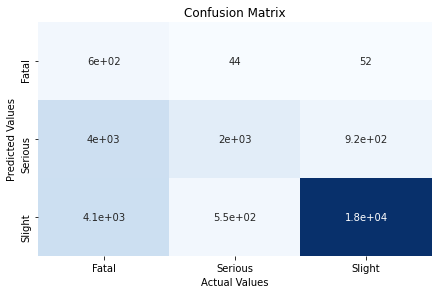

In [59]:
# Evaluating the model
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
accuracy = accuracy_score(y_test, predicted_result_GNB)
recall = recall_score(y_test, predicted_result_GNB, average="weighted")
percision = precision_score(y_test, predicted_result_GNB, average="weighted")
f1score = f1_score(y_test, predicted_result_GNB, average='micro')
confusionmatrix = confusion_matrix(y_test, predicted_result_GNB)

print("========== Evaluation results of Gaussian Naive Bayes Model ==========")
print("Accuracy    : ", accuracy)
print("Recall      : ", recall)
print("Precision   : ", percision)
print("F1 Score    : ", f1score)
print("Confusion Matrix: ")
print(confusionmatrix)

# creating dataframe
class_names = uk_ml.accident_severity.values
dataframe = pd.DataFrame(confusionmatrix, index=['Fatal', 'Serious', 'Slight'], 
                         columns=['Fatal', 'Serious', 'Slight'])

# creating heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout(), plt.xlabel('Actual Values'), plt.ylabel('Predicted Values')
plt.show()

Analysis: The Gaussian Naive Bayes has given the accuracy of 68% which is not so great, and the Recall is 68%, Precision is 88%, F1 score is 68%. And coming to the confusion matrix i see that it has predicted Slight more accurately, but the prediction is less for the others. so, i think this is not good for our analysis.

### KNN Model

KNN Model: K-Nearest Neighbors Algorithm is a powerful algorithm to make the predictions. Here we are using KNN algorithm by taking 'n_neighbors' with 4.

In [60]:
%%time

#K-nearest neighbours Model
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier(n_neighbors=4)
model_knn.fit(X_train,y_train)

CPU times: user 2.93 s, sys: 78.2 ms, total: 3.01 s
Wall time: 2.94 s


KNeighborsClassifier(n_neighbors=4)

In [61]:
%%time
#Predicting the result
predicted_result_KNN=model_knn.predict(X_test)

CPU times: user 1min 5s, sys: 240 ms, total: 1min 5s
Wall time: 1min 6s


========== Evaluation results of KNN Model ==========
Accuracy    :  0.7319275123558484
Recall      :  0.7319275123558484
Precision   :  0.7299087341202894
F1 Score    :  0.7319275123558484
Confusion Matrix: 
[[  221   154   318]
 [   82  3059  3720]
 [  168  3694 18934]]


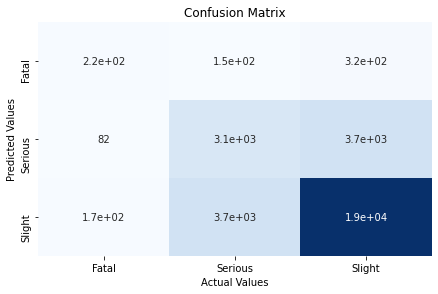

In [62]:
# Evaluating the model
accuracy = accuracy_score(y_test, predicted_result_KNN)
recall = recall_score(y_test, predicted_result_KNN, average="weighted")
percision = precision_score(y_test, predicted_result_KNN, average="weighted")
f1score = f1_score(y_test, predicted_result_KNN, average='micro')
confusionmatrix = confusion_matrix(y_test, predicted_result_KNN)

print("========== Evaluation results of KNN Model ==========")
print("Accuracy    : ", accuracy)
print("Recall      : ", recall)
print("Precision   : ", percision)
print("F1 Score    : ", f1score)
print("Confusion Matrix: ")
print(confusionmatrix)

# creating dataframe
class_names = uk_ml.accident_severity.values
dataframe = pd.DataFrame(confusionmatrix, index=['Fatal', 'Serious', 'Slight'], 
                         columns=['Fatal', 'Serious', 'Slight'])

# creating heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout(), plt.xlabel('Actual Values'), plt.ylabel('Predicted Values')
plt.show()

Analysis: The KNN has given the accuracy of 73% which is better than naive bayes, and the Recall, Precision, F1 score is also 73%. And coming the the confusion matrix i see that true positives have also improved, but lets try some other models.

### Decision Tree

Decision Tree: A decision tree is a support tool with a tree-like structure that models probable outcomes, cost of resources, utilities, and possible consequences. 

In [63]:
%%time

from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

CPU times: user 1.19 s, sys: 51.3 ms, total: 1.24 s
Wall time: 1.11 s


DecisionTreeClassifier()

In [64]:
%%time

# Predicting the result using test data
predicted_result_DT = decision_tree.predict(X_test)

CPU times: user 13.3 ms, sys: 10.7 ms, total: 24 ms
Wall time: 22.5 ms


========== Evaluation results of Decision Tree ==========
Accuracy    :  0.9638220757825371
Recall      :  0.9638220757825371
Precision   :  0.9637453227232134
F1 Score    :  0.9638220757825371
Confusion Matrix: 
[[  614    48    31]
 [   61  6310   490]
 [   24   444 22328]]


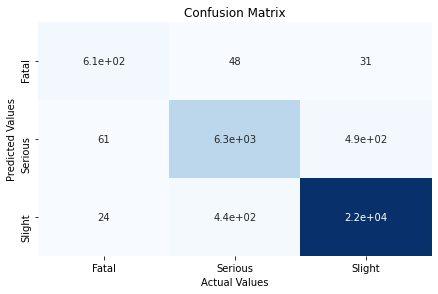

In [65]:
accuracy = accuracy_score(y_test, predicted_result_DT)
recall = recall_score(y_test, predicted_result_DT, average="weighted")
percision = precision_score(y_test, predicted_result_DT, average="weighted")
f1score = f1_score(y_test, predicted_result_DT, average='micro')
confusionmatrix = confusion_matrix(y_test, predicted_result_DT)

print("========== Evaluation results of Decision Tree ==========")
print("Accuracy    : ", accuracy)
print("Recall      : ", recall)
print("Precision   : ", percision)
print("F1 Score    : ", f1score)
print("Confusion Matrix: ")
print(confusionmatrix)

# creating dataframe
class_names = uk_ml.accident_severity.values
dataframe = pd.DataFrame(confusionmatrix, index=['Fatal', 'Serious', 'Slight'], 
                         columns=['Fatal', 'Serious', 'Slight'])

# creating heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout(), plt.xlabel('Actual Values'), plt.ylabel('Predicted Values')
plt.show()

Analysis: The Decision tree has given the accuracy of 96% which is so good, and the Recall, Precision, F1 score is also 96%. And coming to the confusion matrix i see that it has predicted more accuractely compared to the other models which shows True positive and True negative.

### Random Forest Classifier

Random Forest Classifier: Random forest is a supervised learning algorithm, mostly used because of its simplicity and diversity (used for both classification and regression).

In [66]:
%%time

from sklearn.ensemble import RandomForestClassifier
#Using Random forest Classifier
model_rforest = RandomForestClassifier(n_estimators=200) # Number of trees
# Training the data
model_rforest.fit(X_train, y_train)

CPU times: user 34.9 s, sys: 362 ms, total: 35.2 s
Wall time: 35.4 s


RandomForestClassifier(n_estimators=200)

In [67]:
%%time

# Predicting the result using test data
predicted_result_RFC = model_rforest.predict(X_test)

CPU times: user 1.44 s, sys: 9.76 ms, total: 1.45 s
Wall time: 1.45 s


========== Evaluation results of Random Forest Classifier Model ==========
Accuracy    :  0.9640527182866557
Recall      :  0.9640527182866557
Precision   :  0.9651603290363505
F1 Score    :  0.9640527182866557
Confusion Matrix: 
[[  539    69    85]
 [    0  5925   936]
 [    0     1 22795]]


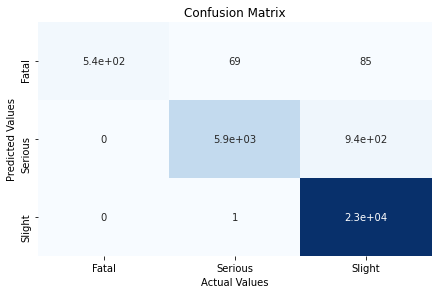

In [68]:
# Evaluating the model
accuracy = accuracy_score(y_test, predicted_result_RFC)
recall = recall_score(y_test, predicted_result_RFC, average="weighted")
percision = precision_score(y_test, predicted_result_RFC, average="weighted")
f1score = f1_score(y_test, predicted_result_RFC, average='micro')
confusionmatrix = confusion_matrix(y_test, predicted_result_RFC)

print("========== Evaluation results of Random Forest Classifier Model ==========")
print("Accuracy    : ", accuracy)
print("Recall      : ", recall)
print("Precision   : ", percision)
print("F1 Score    : ", f1score)
print("Confusion Matrix: ")
print(confusionmatrix)

# creating dataframe
class_names = uk_ml.accident_severity.values
dataframe = pd.DataFrame(confusionmatrix, index=['Fatal', 'Serious', 'Slight'], 
                         columns=['Fatal', 'Serious', 'Slight'])

# creating heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout(), plt.xlabel('Actual Values'), plt.ylabel('Predicted Values')
plt.show()

Analysis: The Random forest classifier has given the accuracy of 96% which is same as decision tree, and the Recall, Precision, F1 score is also 96%. And coming the the confusion matrix i see that it has predicted more accuractely compared to the other models which shows True positive and True negative.

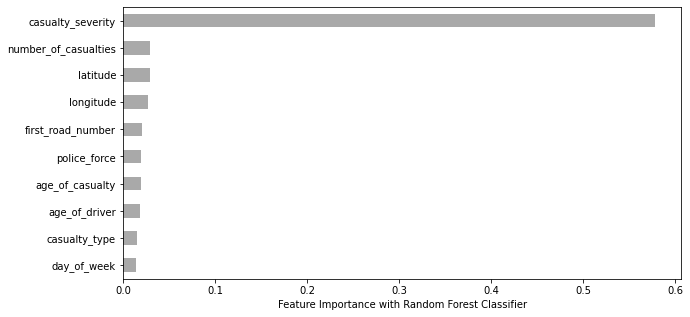

In [69]:
# plot the important features for Random Forest
feature_importances = pd.Series(model_rforest.feature_importances_, index=features.columns)
feature_importances.nlargest(10).sort_values().plot(kind='barh', color='darkgrey', figsize=(10,5))
plt.xlabel('Feature Importance with Random Forest Classifier');

From the above feature importance i see that casualty_severity is the top feature that is related to accident severity which is the target.

# Conclusion: 

* First started with cleaning the data and data pre processing.

* Next performed some visualizations, which shows that most of the accidents are during the working hours from 10-16 and the least is during the night from 22-6, and i see that there are more number of casualties in the night time that is from 22-6 and the least count is rush in the morning 6-10. The reason for more number of casulaties during night may be due to bad lighting is one of the reason, there are more number of casualties with the speed limit of 70.0mph and least number of casualties with a speed limit of 20.0mph

* There are more number of accidents during Friday compared to other days may be due to the weekend, whereas coming to severity of accidents there were more Slight accidents compared to Serious and Fatal.

* Coming to the gender we can see that male are more involved compared to female in the accident. Male percentage is 69.55% whereas female count is 30.45% and the age between 26-35 are more involved in the accidents compared to 36-45 and we can also see that most of the accidents are in Urban area compared to rural area.

Machine learning Algorithms for Predicting Severity of Accidents:

* Inorder to predict the severity of accidents i have performed 4 supervised algorithms they are Gaussian Naive Bayes, KNN, Decision Tree and Random forest classifier.

* The Gaussian Naive Bayes has given the accuracy of 68% which is not so great, and the Recall is 68%, Precision is 88%, F1 score is 68%. And coming to the confusion matrix i see that it has predicted Slight more accurately, but the prediction is less for the others. The KNN has given the accuracy of 73% which is better than naive bayes, and the Recall, Precision, F1 score is also 73%. And coming the the confusion matrix i see that true positives have also improved. The Decision tree has given the accuracy of 96% which is so good, and the Recall, Precision, F1 score is also 96%. And coming to the confusion matrix i see that it has predicted more accuractely compared to the other models which shows True positive and True negative. The Random forest classifier has given the accuracy of 96% which is same as decision tree, and the Recall, Precision, F1 score is also 96%

* So comparing all these analysis i see that Random forest classifier has been given the highest accuracy and confusion matrix in predicting the severity of accidents.

* As my idea of the project is to predict the severity of accidents using the machine learning models which I have mentioned , the analysis which I have got by the end of the project can be helpful for either police department or government of UK in taking necessary steps and to reduce the number of accidents from occuring.